In [1]:
import numpy as np
from scipy import ndimage

In [2]:
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

In [35]:
# RELU ACTIVATION FN
def activate(x):
    if x<0:
        return 0
    else:
        return x

f = np.vectorize(activate)

In [14]:
def convolutional_layer(image, filters):
    output = []
    im_x = image.shape[0]
    im_y = image.shape[1]
    im_z = image.shape[2]
    for cfilter in filters:
        cfilter_x, cfilter_y, cfilter_z = cfilter.shape
        conv = ndimage.convolve(image, cfilter)
        p1 = im_x - cfilter_x + 1
        p2 = im_y - cfilter_y + 1
        p3 = im_z - cfilter_z + 1
        output.append(f(conv[:p1, :p2, :p3]))
    return output        
        

In [15]:
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
import cv2
im = cv2.imread("mnist_output_0.png")
r = 32
dim = (32, 32)
 
# perform the actual resizing of the image and show it
resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
resized.shape
im = resized

In [17]:
def get_filters(x,y,z,n):
    output = []
    for i in range(n):
        r=np.random.rand(x,y,z)*2
        output.append(r.astype('int'))
    return output

In [9]:
filters = get_filters(5,5,im.shape[2],6)

In [18]:
t = convolutional_layer(im,filters)

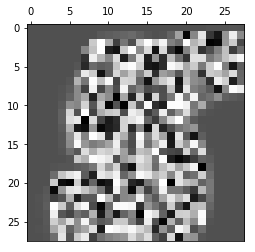

None


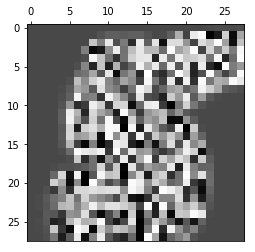

None


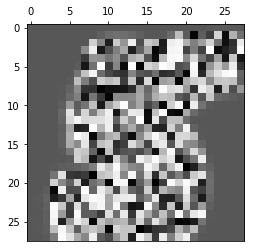

None


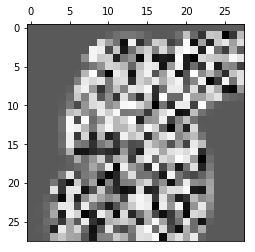

None


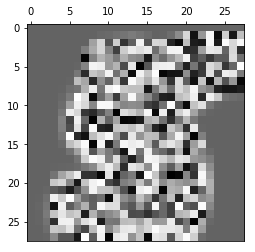

None


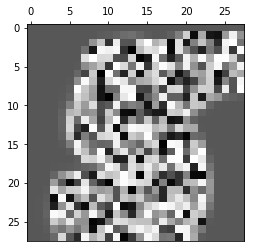

None


In [19]:
#convolutional layer 1 output
for r in t:
    print show(r.reshape(r.shape[0],r.shape[0]))

In [20]:
im.shape

(32, 32, 3)

In [21]:
def calculate(array):
    return np.amax(array)

def subsampling(imset, layer_dim, stride):
    output = []
    l, h = layer_dim
    for r in imset:
        x = r.reshape(r.shape[0],r.shape[0])
        out = []
        for i in xrange(0,x.shape[0]-l+1,stride):
            row = []
            for j in xrange(0,x.shape[1]-h+1,stride):
                row.append(calculate(x[i:i+l, j:j+h]))
            out.append(row)
        output.append(np.asarray(out))
    return np.asarray(output), np.dstack(output)

In [22]:
#subsampling 1
list_out2, out2 = subsampling(t,(2,2),2)

In [23]:
out2.shape

(14, 14, 6)

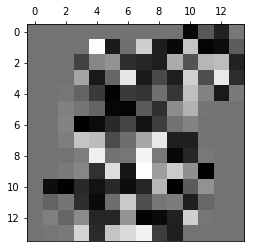

None


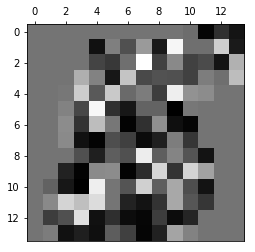

None


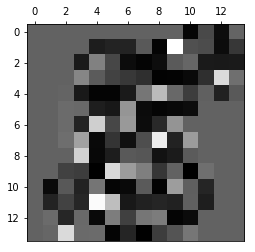

None


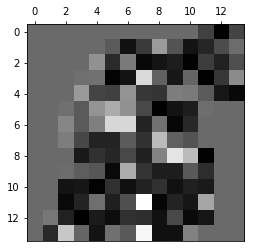

None


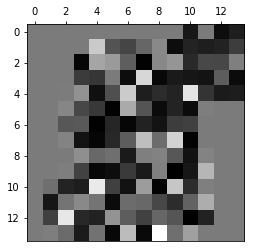

None


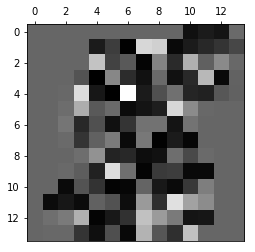

None


In [24]:
#subsampling layer 1 output
for r in list_out2:
    print show(r)

In [25]:
filters = get_filters(5,5,out2.shape[2],16)
t2 = convolutional_layer(out2,filters)

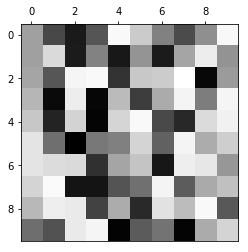

None


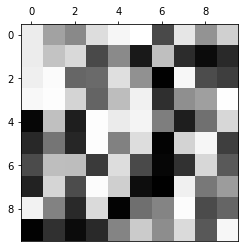

None


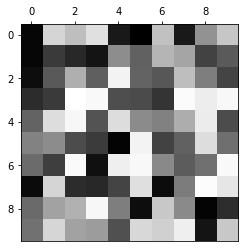

None


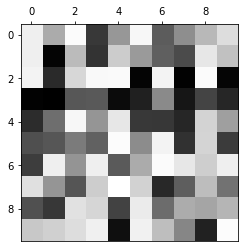

None


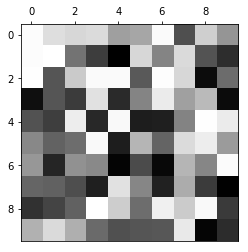

None


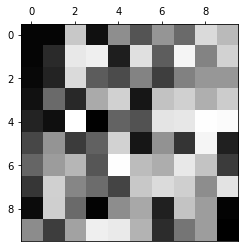

None


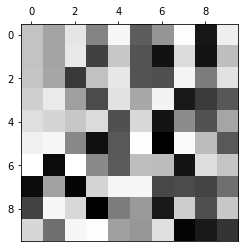

None


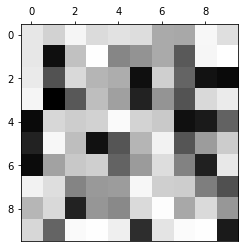

None


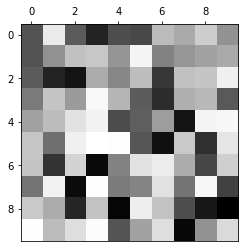

None


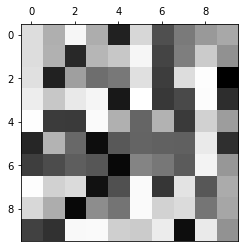

None


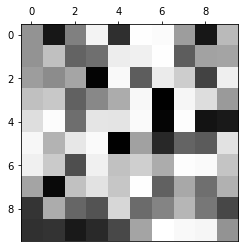

None


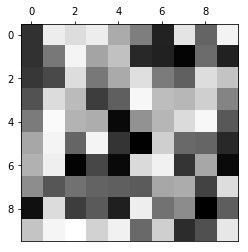

None


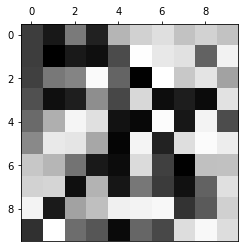

None


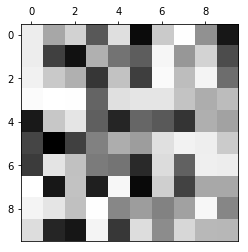

None


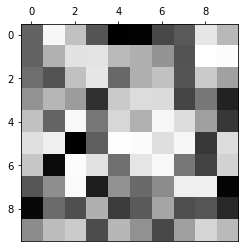

None


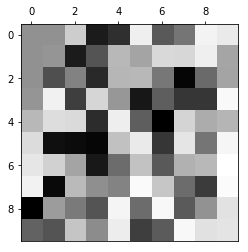

None


In [26]:
#convolutional layer 2 output
for r in t2:
    print show(r.reshape(r.shape[0],r.shape[0]))

In [29]:
# subsampling 2
list_out3, out3 = subsampling(t2,(2,2),2)

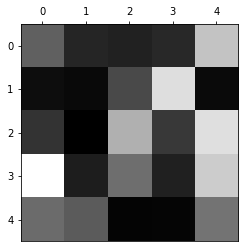

None


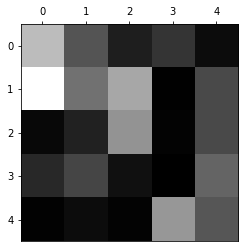

None


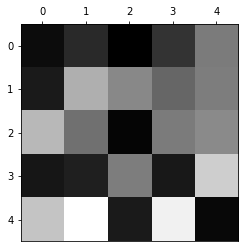

None


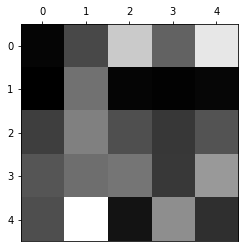

None


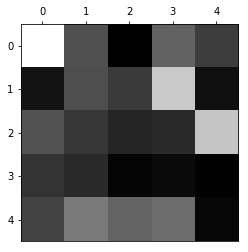

None


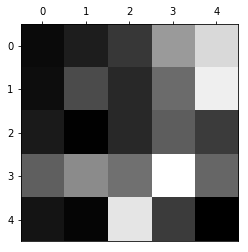

None


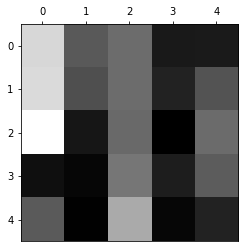

None


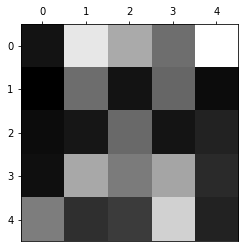

None


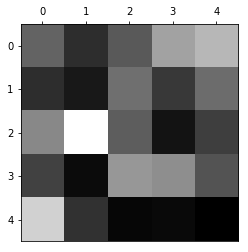

None


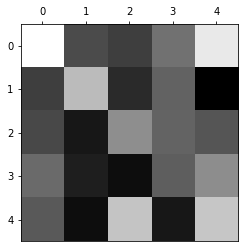

None


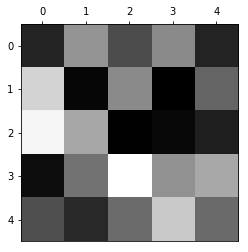

None


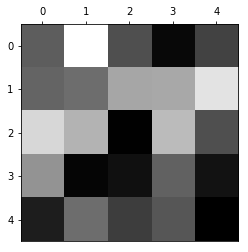

None


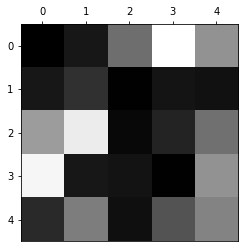

None


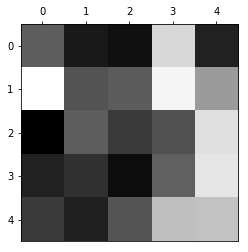

None


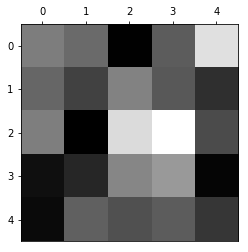

None


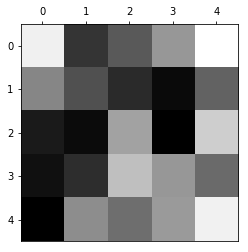

None


In [30]:
for r in list_out3:
    print show(r)

In [31]:
#fully connected 1
flat_mat = out3.flatten()
w = np.asmatrix(np.random.rand(120,flat_mat.shape[0]+1))
x = np.asmatrix(np.append(flat_mat,1))
valf = np.asarray(np.matmul(w,x.T))

In [32]:
#fully connected 2
flat_mat = valf.flatten()
w = np.asmatrix(np.random.rand(84,flat_mat.shape[0]+1))
x = np.asmatrix(np.append(flat_mat,1))
valf2 = np.asarray(np.matmul(w,x.T))

In [33]:
#fully connected 3
flat_mat = valf2.flatten()
w = np.asmatrix(np.random.rand(10,flat_mat.shape[0]+1))
x = np.asmatrix(np.append(flat_mat,1))
valf3 = np.asarray(np.matmul(w,x.T))

In [34]:
valf3

array([[9.50194863e+07],
       [1.04276862e+08],
       [9.31979815e+07],
       [1.06851368e+08],
       [1.18614415e+08],
       [1.04355617e+08],
       [1.04422418e+08],
       [1.06649457e+08],
       [9.20556757e+07],
       [1.06866185e+08]])